<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Twitter
`Fecha de entrega: Mayo 20, 2021 (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

###  `[25 pts]` Punto 1: Extraer Tuits
Extraer mínimo 100 tuits de Twitter usando la API

❌ No escoger un tema de los que hicimos en clase (día de las madres, Giro de Italia, #EraGoldeYepes)

In [7]:
import pandas as pd 
import tweepy

keys = pd.read_csv("C:/Users/johnv/llaves.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)


tweets = tweepy.Cursor(api.search,
                       q=['Motos -RT'],
                       lang='es',
                       geocode='4.7110,-74.0721,100km',
                       tweet_mode='extended',
                       include_rts=False,
                       ).items(100)

t = [tweet for tweet in tweets]


t_processed = []

for tweet in t: 
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append('Bogotá')
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/stuatus/{tweet.id}")
    
    t_processed.append(temp)
    
    
data = pd.DataFrame(t_processed)
data.columns = ['tweets', 'date', 'city', 'user_location', 'id', 'link']
data

,tweets,date,city,user_location,id,link
0,Harry Potter y el misterio de por qué me gusta...,2021-05-18 00:35:18,Bogotá,Bogotá,1394451492447342605,https://twitter.com/i/web/stuatus/139445149244...
1,Tumban a la gente de las motos a toda velocida...,2021-05-17 22:20:56,Bogotá,"Bogotá, D.C., Colombia",1394417680510242823,https://twitter.com/i/web/stuatus/139441768051...
2,@germanayalaosor @8389amanda El mismo que sent...,2021-05-17 21:57:42,Bogotá,Bogotá,1394411832929136640,https://twitter.com/i/web/stuatus/139441183292...
3,Aclaro que eran motos particulares y de dotaci...,2021-05-17 20:23:19,Bogotá,"Villavicencio, Colombia",1394388081168502793,https://twitter.com/i/web/stuatus/139438808116...
4,"Se robaron la plata de las motos eléctricas, d...",2021-05-17 20:14:17,Bogotá,"Bogotá, D.C., Colombia",1394385807054675972,https://twitter.com/i/web/stuatus/139438580705...
...,...,...,...,...,...,...
95,🎶🎵 pasa una banda de criminales\nen sus hermos...,2021-05-15 03:19:40,Bogotá,Bogotá Colombia,1393405695396093954,https://twitter.com/i/web/stuatus/139340569539...
96,Motos bien abejas detrás de la ambulancia evad...,2021-05-15 02:04:13,Bogotá,Bogotá,1393386707291082755,https://twitter.com/i/web/stuatus/139338670729...
97,"Ojo, por la primero de mayo van, sentido sur, ...",2021-05-15 00:30:32,Bogotá,"Bogotá, D.C., Colombia",1393363132874170372,https://twitter.com/i/web/stuatus/139336313287...
98,Ojoooo muchoooos tombos en motos con los del e...,2021-05-15 00:01:40,Bogotá,"Manizales, Colombia",1393355866825441280,https://twitter.com/i/web/stuatus/139335586682...


###  `[25 pts]` Punto 2: Hacer una visualización sobre esos tuits

In [8]:
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("spanish")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

import re

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.tweets.apply(lambda texto: pre_procesado(texto))

data.head()

,tweets,date,city,user_location,id,link,pp
0,Harry Potter y el misterio de por qué me gusta...,2021-05-18 00:35:18,Bogotá,Bogotá,1394451492447342605,https://twitter.com/i/web/stuatus/139445149244...,harry potter misterio gustan motos súper depor...
1,Tumban a la gente de las motos a toda velocida...,2021-05-17 22:20:56,Bogotá,"Bogotá, D.C., Colombia",1394417680510242823,https://twitter.com/i/web/stuatus/139441768051...,tumban gente motos toda velocidad golpean pobr...
2,@germanayalaosor @8389amanda El mismo que sent...,2021-05-17 21:57:42,Bogotá,Bogotá,1394411832929136640,https://twitter.com/i/web/stuatus/139441183292...,germanayalaosor amanda mismo sentimos carros m...
3,Aclaro que eran motos particulares y de dotaci...,2021-05-17 20:23:19,Bogotá,"Villavicencio, Colombia",1394388081168502793,https://twitter.com/i/web/stuatus/139438808116...,aclaro motos particulares dotación pasaron dos...
4,"Se robaron la plata de las motos eléctricas, d...",2021-05-17 20:14:17,Bogotá,"Bogotá, D.C., Colombia",1394385807054675972,https://twitter.com/i/web/stuatus/139438580705...,robaron plata motos eléctricas universidad dis...


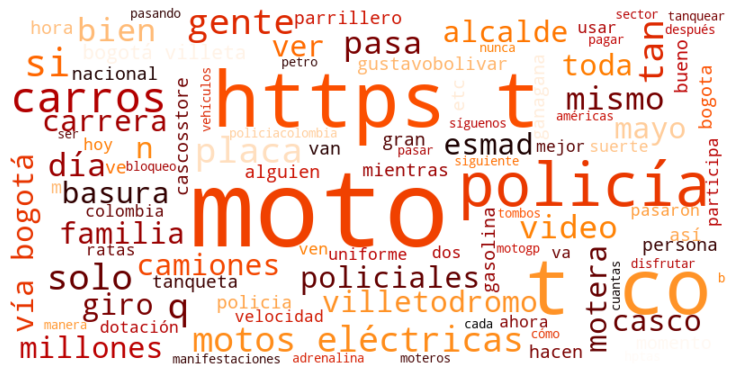

In [11]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=120, max_words=100,
                      background_color="white", colormap="gist_heat",
                      stopwords=stopwords).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()